In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

<b>Preparing the dataset<br>
Preparation:<br></b>

<b>Fill missing values with zeros.<br>
Do train/validation/test split with 60%/20%/20% distribution.<br>
Use the train_test_split function and set the random_state parameter to 1.<br>
Use DictVectorizer(sparse=True) to turn the dataframes into matrices. 

In [3]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [4]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [5]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [6]:
df.describe()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.000000,9222.000000,8996.000000,9704.000000,8774.000000,9704.000000,9202.000000,9704.000000
mean,199.708368,3.962481,149.657292,3001.280993,15.021928,2011.484027,-0.006412,14.985243
std,49.455319,1.999323,29.879555,497.894860,2.510339,6.659808,1.048162,2.556468
min,10.000000,0.000000,37.000000,952.681761,6.000000,2000.000000,-4.000000,6.200971
25%,170.000000,3.000000,130.000000,2666.248985,13.300000,2006.000000,-1.000000,13.267459
50%,200.000000,4.000000,149.000000,2993.226296,15.000000,2012.000000,0.000000,15.006037
75%,230.000000,5.000000,170.000000,3334.957039,16.700000,2017.000000,1.000000,16.707965
max,380.000000,13.000000,271.000000,4739.077089,24.300000,2023.000000,4.000000,25.967222


In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
numerical_columns = list(df.dtypes[df.dtypes != 'object'].index)


for n in numerical_columns:
     df[n] = df[n].fillna(0)

In [8]:
df.describe()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.000000,9704.000000,9704.000000,9704.000000,9704.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,3.765664,138.738355,3001.280993,13.582275,2011.484027,-0.006080,14.985243
std,49.455319,2.130715,48.401189,497.894860,5.025294,6.659808,1.020689,2.556468
min,10.000000,0.000000,0.000000,952.681761,0.000000,2000.000000,-4.000000,6.200971
25%,170.000000,2.000000,124.000000,2666.248985,12.600000,2006.000000,-1.000000,13.267459
50%,200.000000,4.000000,146.000000,2993.226296,14.700000,2012.000000,0.000000,15.006037
75%,230.000000,5.000000,168.000000,3334.957039,16.500000,2017.000000,1.000000,16.707965
max,380.000000,13.000000,271.000000,4739.077089,24.300000,2023.000000,4.000000,25.967222


In [11]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val), len(df_test)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

df_train_copy = df_train.copy()
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

<b>Question 1 <br>
Lets train a decision tree regressor to predict the fuel_efficiency_mpg variable. <br>
Train a model with max_depth=1.</b><br>
<b>Which feature is used for splitting the data?
'vehicle_weight'<br>
'model_year'<br>
'origin'<br>
'fuel_type'<br> <br> 
Answer: vehicle_weight</b>

In [12]:
from sklearn.tree import DecisionTreeClassifier ,DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [13]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dicts)

In [14]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

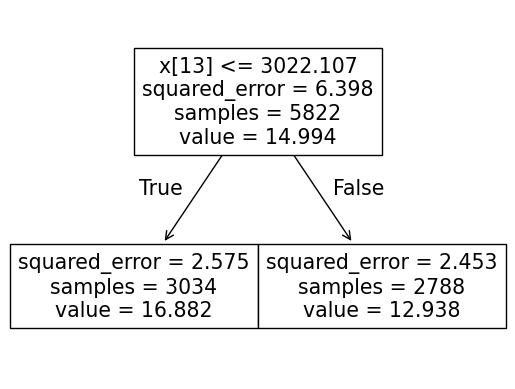

In [46]:
from sklearn import tree

tree.plot_tree(dt)

plt.show()

In [16]:
dv.get_feature_names_out()[13]

'vehicle_weight'

In [17]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



<b> Question 2 <br> 
Train a random forest regressor with these parameters:<br>

n_estimators=10<br>
random_state=1<br>
n_jobs=-1 (optional - to make training faster)<br>
What's the RMSE of this model on the validation data?<br> 

0.045<br>
0.45<br>
4.5<br>
45.0<br>

<b>Answer: 0.45</b>


In [32]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [33]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [34]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [35]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs = -1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)


In [37]:
rmse(y_val, y_pred)

np.float64(0.45957772230927263)

<b> Question 3<br>
Now let's experiment with the n_estimators parameter<br>

Try different values of this parameter from 10 to 200 with step 10.<br>
Set random_state to 1.<br>
Evaluate the model on the validation dataset.<br>
After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.<br>

10<br>
25<br>
80<br>
200<br>

<b> Answer : 200</b> As the RMSE keeps on improving. Hence mentioned the latest Iteration number

In [38]:
scores = []
for n in range(10, 201,10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs = -1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse_score = rmse(y_val, y_pred)
    scores.append((n,round(rmse_score,3)))


In [39]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse_score'])

In [40]:
df_scores

,n_estimators,rmse_score
0,10,0.460
1,20,0.454
2,30,0.452
3,40,0.449
4,50,0.447
5,60,0.445
6,70,0.445
7,80,0.445
8,90,0.445
9,100,0.445


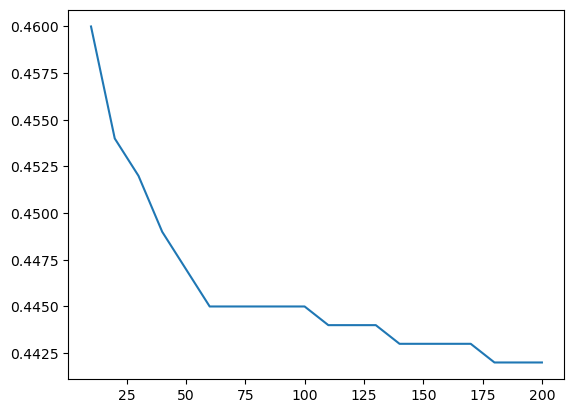

In [47]:
plt.plot(df_scores.n_estimators, df_scores.rmse_score)
plt.show()


<b> Question 4</b><br>
Let's select the best max_depth:<br>

Try different values of max_depth: [10, 15, 20, 25]<br>
For each of these values,<br>
try different values of n_estimators from 10 till 200 (with step 10)<br>
calculate the mean RMSE<br>
Fix the random seed: random_state=1<br>
What's the best max_depth, using the mean RMSE?<br>

10<br>
15<br>
20<br>
25<br>

<b> Answer: The bext Max Depth is 10 </b>



In [48]:
scores_depth = []

for d in [10, 15, 20,25]:
    rmse_score = 0
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=d,
                                    random_state=1, 
                                   n_jobs = -1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse_score = rmse_score + rmse(y_val, y_pred)
    rmse_mean = rmse_score/20
    scores_depth.append((d, rmse_mean))

In [49]:
df_scores_depth = pd.DataFrame(scores_depth, columns=['max_depth', 'rmse_mean'])

In [50]:
df_scores_depth

,max_depth,rmse_mean
0,10,0.441808
1,15,0.445417
2,20,0.446253
3,25,0.445910


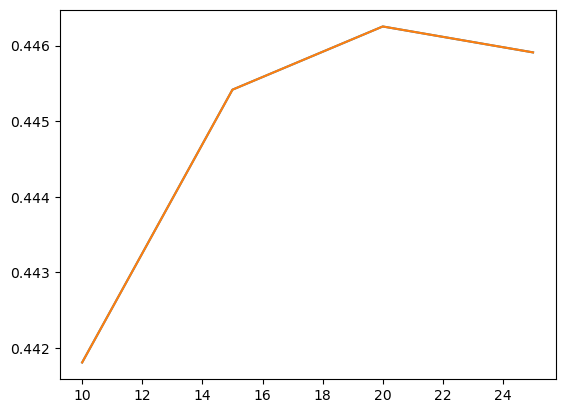

In [52]:
plt.plot(df_scores_depth.max_depth, df_scores_depth.rmse_mean)
plt.show()

<b> Question 5</b><br>
We can extract feature importance information from tree-based models.<br>

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.<br>

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.<br>
For this homework question, we'll find the most important feature:

Train the model with these parameters:<br>
n_estimators=10,<br>
max_depth=20,<br>
random_state=1,<br>
n_jobs=-1 (optional)<br>
Get the feature importance information from this model<br>
What's the most important feature (among these 4)?<br>

vehicle_weight<br>
horsepower<br>
acceleration<br>
engine_displacement<br>

<b>Answer: Vehicle Weight</b>

In [56]:
rf_q5 = RandomForestRegressor(n_estimators=10, max_depth = 20, random_state=1, n_jobs = -1)
rf_q5.fit(X_train, y_train)

y_pred = rf_q5.predict(X_val)

In [54]:
rf_q5.feature_importances_

array([1.14797006e-02, 3.57108549e-04, 3.45384113e-04, 3.27279191e-03,
       3.25424323e-04, 3.60383601e-04, 1.59978977e-02, 3.21230009e-03,
       2.34334695e-03, 1.63498954e-03, 4.62246496e-04, 5.18739639e-04,
       5.39721689e-04, 9.59149965e-01])

In [55]:
importances = rf_q5.feature_importances_
feature_names = dv.get_feature_names_out()

data = {'Feature Names': feature_names, 'Importance': importances}

df_importance = pd.DataFrame(data)

df_importance


,Feature Names,Importance
0,acceleration,0.011480
1,drivetrain=All-wheel drive,0.000357
2,drivetrain=Front-wheel drive,0.000345
3,engine_displacement,0.003273
4,fuel_type=Diesel,0.000325
5,fuel_type=Gasoline,0.000360
6,horsepower,0.015998
7,model_year,0.003212
8,num_cylinders,0.002343
9,num_doors,0.001635


<b>Question 6</b>
Now let's train an XGBoost model! For this question, we'll tune the eta parameter:<br>

Install XGBoost<br>
Create DMatrix for train and validation<br>
Create a watchlist<br>
Train a model with these parameters for 100 rounds:<br>
xgb_params = {<br>
    'eta': 0.3, <br>
    'max_depth': 6,<br>
    'min_child_weight': 1,<br>
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}<br>
Now change eta from 0.3 to 0.1.<br>

Which eta leads to the best RMSE score on the validation dataset?<br>

0.3<br>
0.1<br>
Both give equal value<br>
<b> Answer: eta = 0.1 gives lesser/best RMSE score on the validation set </b>

In [57]:
import xgboost as xgb

In [58]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [59]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [60]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train-rmse', 'val-rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [67]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=101,verbose_eval=5,
                  evals=watchlist)

In [68]:
s = output.stdout

In [69]:
print(s)

[0]	train-rmse:1.81393	val-rmse:1.85444
[5]	train-rmse:0.51381	val-rmse:0.55664
[10]	train-rmse:0.37115	val-rmse:0.43896
[15]	train-rmse:0.34666	val-rmse:0.43362
[20]	train-rmse:0.33553	val-rmse:0.43376
[25]	train-rmse:0.32268	val-rmse:0.43683
[30]	train-rmse:0.31475	val-rmse:0.43752
[35]	train-rmse:0.30960	val-rmse:0.43784
[40]	train-rmse:0.30202	val-rmse:0.43968
[45]	train-rmse:0.29126	val-rmse:0.44024
[50]	train-rmse:0.28456	val-rmse:0.44140
[55]	train-rmse:0.27618	val-rmse:0.44225
[60]	train-rmse:0.26768	val-rmse:0.44290
[65]	train-rmse:0.26174	val-rmse:0.44352
[70]	train-rmse:0.25489	val-rmse:0.44531
[75]	train-rmse:0.24792	val-rmse:0.44628
[80]	train-rmse:0.24254	val-rmse:0.44689
[85]	train-rmse:0.23644	val-rmse:0.44749
[90]	train-rmse:0.23193	val-rmse:0.44839
[95]	train-rmse:0.22475	val-rmse:0.44904
[100]	train-rmse:0.21754	val-rmse:0.45039



In [70]:
df_scores_xgboost = parse_xgb_output(output)

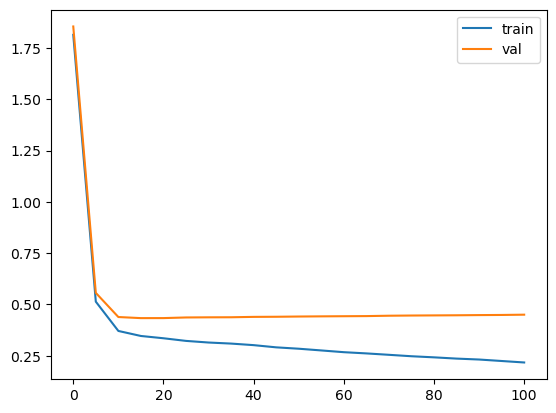

In [71]:
plt.plot(df_scores_xgboost.num_iter, df_scores_xgboost['train-rmse'], label='train')
plt.plot(df_scores_xgboost.num_iter, df_scores_xgboost['val-rmse'], label='val')
plt.legend()
plt.show()

In [74]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=101,verbose_eval=5,
                  evals=watchlist)

In [75]:
s = output.stdout

In [76]:
print(s)

[0]	train-rmse:2.28944	val-rmse:2.34561
[5]	train-rmse:1.41247	val-rmse:1.44988
[10]	train-rmse:0.91008	val-rmse:0.94062
[15]	train-rmse:0.63402	val-rmse:0.66672
[20]	train-rmse:0.48983	val-rmse:0.53064
[25]	train-rmse:0.41881	val-rmse:0.46891
[30]	train-rmse:0.38342	val-rmse:0.44289
[35]	train-rmse:0.36435	val-rmse:0.43250
[40]	train-rmse:0.35343	val-rmse:0.42746
[45]	train-rmse:0.34621	val-rmse:0.42595
[50]	train-rmse:0.33998	val-rmse:0.42498
[55]	train-rmse:0.33480	val-rmse:0.42449
[60]	train-rmse:0.33054	val-rmse:0.42456
[65]	train-rmse:0.32602	val-rmse:0.42493
[70]	train-rmse:0.32202	val-rmse:0.42503
[75]	train-rmse:0.31895	val-rmse:0.42526
[80]	train-rmse:0.31667	val-rmse:0.42563
[85]	train-rmse:0.31440	val-rmse:0.42574
[90]	train-rmse:0.31059	val-rmse:0.42586
[95]	train-rmse:0.30625	val-rmse:0.42611
[100]	train-rmse:0.30364	val-rmse:0.42635



In [77]:
df_scores_xgboost1 = parse_xgb_output(output)

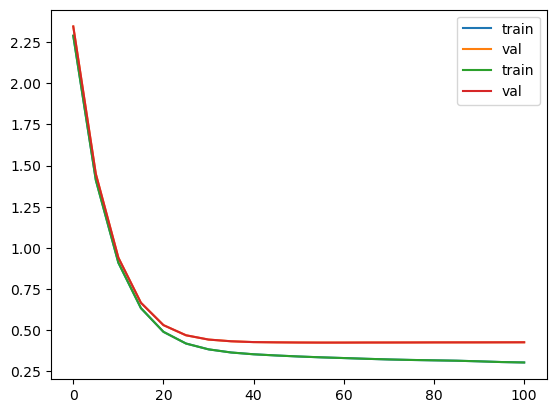

In [79]:
plt.plot(df_scores_xgboost1.num_iter, df_scores_xgboost1['train-rmse'], label='train')
plt.plot(df_scores_xgboost1.num_iter, df_scores_xgboost1['val-rmse'], label='val')
plt.legend()
plt.show()